# Import

In [1]:
from jupyterbacktest import *

# Params

In [2]:
BTC_WEIGHTS = [.05, .10, .20]

# Strategy

In [3]:
def long_stock_and_btc_ratio(stock_weight, btc_weight):
    class Strg(Strategy):
        _name = f'SPY:BTC = {stock_weight:.2f}:{btc_weight:.2f}'
        def step(self, i, now, broker):
            if i%5==0:
                broker.trade_stock_target_weight('SPY', +stock_weight)
                broker.trade_crypto_target_weight('BTC.USD', +btc_weight)
    return Strg

# Run

Altogether will run 4 strategies
[2020-12-20, 22:19:04] Total 4 backtests started	(2015-01-02 - 2020-12-18)
	[2020-12-20, 22:19:04] RUNNING	| #0 : P('SPY +1.0', rbfq=10)
	[2020-12-20, 22:19:04] RUNNING	| #1 : SPY:BTC = 0.95:0.05
	[2020-12-20, 22:19:05] RUNNING	| #2 : SPY:BTC = 0.90:0.10
	[2020-12-20, 22:19:05] RUNNING	| #3 : SPY:BTC = 0.80:0.20
[2020-12-20, 22:19:05] Total 4 backtests completed	(2015-01-02 - 2020-12-18)



,Return,CAGR,Mu,Std,Sharpe,Calmar,MDD,MDDdur,MDDloc
"P('SPY +1.0', rbfq=10)",+102.0%,+12.5%,+11.8%,18.5%,+0.638,+0.349,-33.7%,24d,2020-02-19 - 2020-03-23
SPY:BTC = 0.80:0.20,+440.6%,+32.7%,+28.3%,22.4%,+1.265,+0.841,-33.6%,26d,2020-02-14 - 2020-03-23
SPY:BTC = 0.90:0.10,+236.1%,+22.5%,+20.3%,19.1%,+1.061,+0.605,-33.6%,26d,2020-02-14 - 2020-03-23
SPY:BTC = 0.95:0.05,+161.7%,+17.5%,+16.1%,18.4%,+0.874,+0.480,-33.5%,26d,2020-02-14 - 2020-03-23


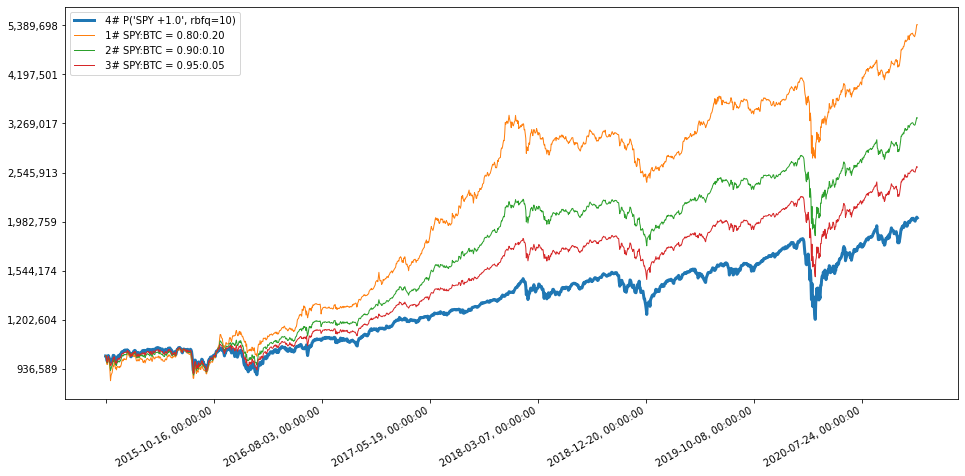

In [7]:
bt = quick_backtest([
    long('SPY +1.0')
],[
    *(long_stock_and_btc_ratio(1-w, w) for w in BTC_WEIGHTS)    
],
    barsize='1d',
    start='2015-01-01',    
    run=dict(parallel=False),
    evaluate=dict(by='Sharpe'),
)

# Conclusion

By assigning 5% to 20% portfolio weight into Bitcoin related assets, you can improve portfolio total return substantially. We observed improvement in both Sharpe ratio and Calmer ratio, indicating that the return per unit of risk taken is also increased.